In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gempa.csv")

In [ ]:
df.describe()

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2
count,92887.000000,92887.000000,92887.000000,92887.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,-3.404577,119.159707,49.009399,3.592788,170.142852,60.202121,30.358062,197.450303,56.576344,35.250018
std,4.354584,10.833202,76.761070,0.834042,88.359267,19.699252,99.957906,118.920519,21.274923,98.235894
min,-11.000000,94.020000,2.000000,1.000000,0.000000,2.300000,-180.000000,0.000000,1.500000,-180.000000
25%,-7.885000,113.170000,10.000000,3.000000,107.550000,46.950000,-28.500000,63.115000,39.400000,-19.900000
50%,-2.910000,121.160000,16.000000,3.500000,144.600000,62.300000,57.600000,240.720000,58.400000,56.500000
75%,0.140000,126.900000,54.000000,4.200000,217.500000,76.400000,100.150000,297.480000,74.700000,112.600000
max,6.000000,142.000000,750.000000,7.900000,359.200000,90.000000,180.000000,359.980000,90.000000,180.000000


In [ ]:
df.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB


# **Membershikan data**!

In [ ]:
df['depth'] = df['depth'].astype(np.float64)


In [ ]:
# Identifikasi kolom non-numerik
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Kolom non-numerik:", non_numeric_columns)



Kolom non-numerik: Index(['tgl', 'ot', 'remark'], dtype='object')


In [ ]:
# Hapus kolom non-numerik atau tangani mereka secara terpisah
df_numeric = df.drop(columns=non_numeric_columns)

# **Uji Regresi Manual**
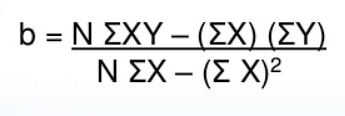

In [ ]:
x = df["depth"]
y = df["mag"]

n = len(x)
sumX =np.sum(x)
sumY =np.sum(y)

xy = np.sum(x*y)



x2 = sumX**2
y2 = sumY**2

sum_x2 = np.sum(x**2)
sum_y2 = np.sum(y**2)


In [ ]:
atas = (n*xy)-(sumX*sumY)
bawah = (n*sumX)-(x2)

slope = atas/bawah

intercept = (sumY - slope*sumX) / n
print(intercept)
print(slope)

3.906280820791985
-0.006396585533428359


# **Uji Regresi Tidak manual**

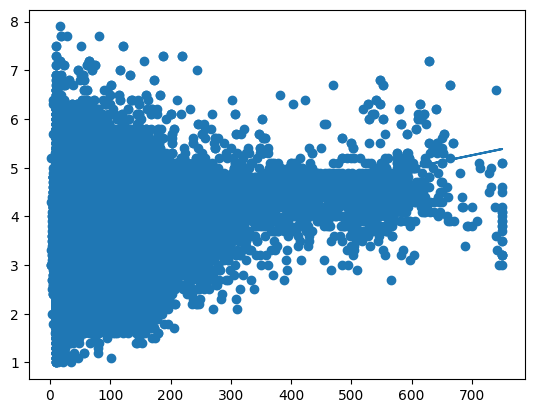

In [ ]:


slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
print(intercept)
print(slope)


3.467601983783922
0.002554326950441005


# **Korelasi**

<Axes: >

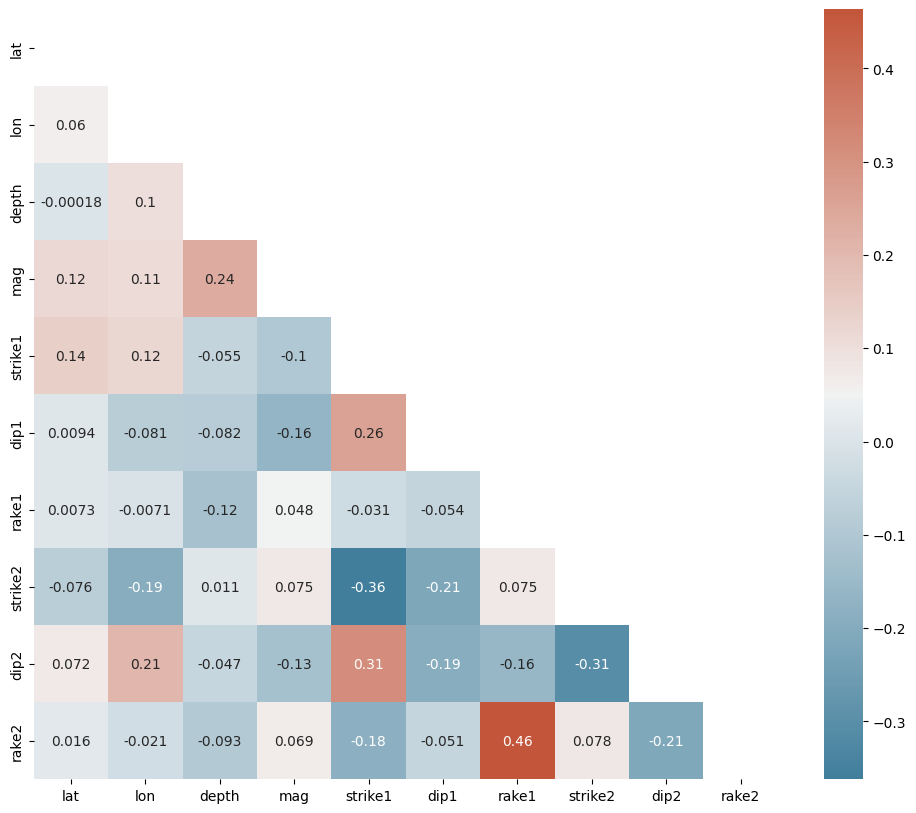

In [ ]:
# Correlation between different variables
#
corr = df_numeric.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
# Hitung matriks korelasi
corr = df_numeric.corr()

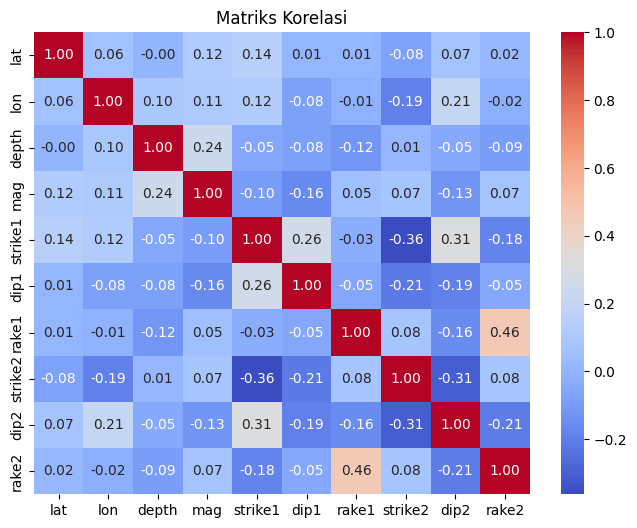

In [ ]:
# Buat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
correlations = df_numeric.corr()
print(correlations)

              lat       lon     depth       mag   strike1      dip1     rake1  \
lat      1.000000  0.060283 -0.000180  0.118029  0.143592  0.009385  0.007321   
lon      0.060283  1.000000  0.100506  0.109827  0.119431 -0.080501 -0.007052   
depth   -0.000180  0.100506  1.000000  0.235087 -0.054807 -0.082208 -0.120880   
mag      0.118029  0.109827  0.235087  1.000000 -0.100745 -0.163712  0.047801   
strike1  0.143592  0.119431 -0.054807 -0.100745  1.000000  0.258510 -0.031151   
dip1     0.009385 -0.080501 -0.082208 -0.163712  0.258510  1.000000 -0.053648   
rake1    0.007321 -0.007052 -0.120880  0.047801 -0.031151 -0.053648  1.000000   
strike2 -0.076485 -0.193230  0.011165  0.074816 -0.362162 -0.214666  0.075350   
dip2     0.071965  0.205112 -0.047348 -0.125513  0.312449 -0.192182 -0.156815   
rake2    0.015692 -0.020535 -0.093338  0.069326 -0.183566 -0.050540  0.463483   

          strike2      dip2     rake2  
lat     -0.076485  0.071965  0.015692  
lon     -0.193230  0.205112 

# **Koefisien Korelasi Manual**
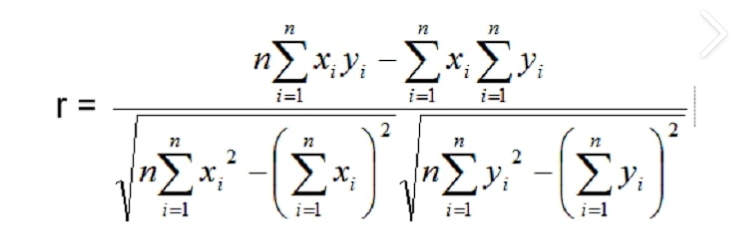

In [ ]:
x = df['lon']
y = df['lot']


n = len(x)
# hitung jumlah dari x dan y
sumX =np.sum(x)
sumY =np.sum(y)
# hitung jumlah dari hasil kali x dan y
sumXY = np.sum(x*y)
# hitung jumlah dari kuadrat x,y
x2 = sumX**2
y2 = sumY**2

sumX2 = np.sum(x**2)
sumY2 = np.sum(y**2)

NameError: name 'df' is not defined

In [ ]:
atas = n * sumXY - sumX * sumY
bawah = np.sqrt((n * sumX2 - sumX ** 2) * (n * sumY2 - sumY ** 2))
r = atas / bawah

# Tampilkan hasil
print(f"Koefisien Korelasi Pearson (Manual): {r:.4f}")

# Bandingkan dengan hasil dari pandas
r_pandas = df["lat"].corr(df["lon"])

print(f"Koefisien Korelasi Pearson (Pandas): {r_pandas:.4f}")

Koefisien Korelasi Pearson (Manual): 0.0603
Koefisien Korelasi Pearson (Pandas): 0.0603


2
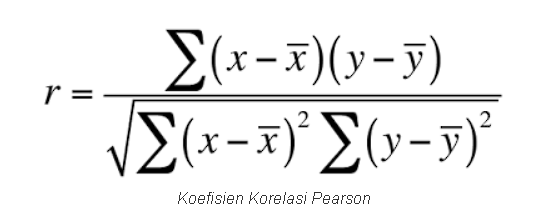

In [ ]:
# Menghitung Rata rata x,y
mean_x = np.mean(x)
mean_y = np.mean(y)
# atau
meanX = sum(x) / n
meanY = sum(y) / n
#
jumlahAtas = np.sum((x - meanX) * (y - meanY))
bawahKiri = np.sum((x - meanX) ** 2)
bawahKanan = np.sum((y - meanY) ** 2)

atas = jumlahAtas
bawah = np.sqrt(bawahKiri * bawahKanan)

r_manual = atas / bawah

# Tampilkan hasil
print(f"Koefisien Korelasi Pearson (Manual): {r:.4f}")

# Bandingkan dengan hasil dari pandas
r_manual = df["lat"].corr(df["lon"])

print(f"Koefisien Korelasi Pearson (Pandas): {r_manual:.4f}")


Koefisien Korelasi Pearson (Manual): 0.0603
Koefisien Korelasi Pearson (Pandas): 0.0603


In [ ]:
# Buat DataFrame untuk menampilkan hasil
data = {
    'Parameter': ['n', 'Sum of x', 'Sum of y', 'Sum of x*y', 'Sum of x^2', 'Sum of y^2'],
    'Value': [n, sumX, sumY, sumXY, sumX2, sumY2]
}

tabel = pd.DataFrame(data)

print(tabel)

    Parameter         Value
0           n  9.288700e+04
1    Sum of x -3.162410e+05
2    Sum of y  1.106839e+07
3  Sum of x*y -3.741903e+07
4  Sum of x^2  2.838008e+06
5  Sum of y^2  1.329807e+09


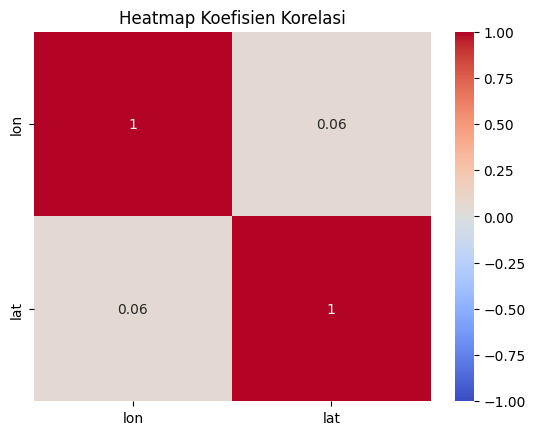

In [ ]:
correlation_matrix = df[['lon', 'lat']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Koefisien Korelasi')
plt.show()

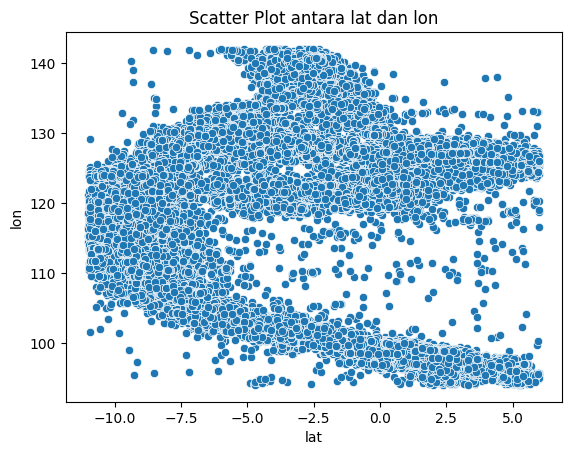

In [ ]:
sns.scatterplot(x=x, y=y)
plt.title('Scatter Plot antara lat dan lon')
plt.xlabel('lat')
plt.ylabel('lon')
plt.show()

# **Linear Regression**

In [ ]:

# Memisahkan fitur (X) dan target (y)
X = df[['lat', 'lon', 'depth']]
y = df['mag']

# Membagi data menjadi data latihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-Squared: {r2:.2f}')

# Menggunakan model untuk prediksi
new_data = pd.DataFrame({'lat': [-6.5], 'lon': [120.0], 'depth': [50]})
predicted_magnitude = model.predict(new_data)
print(f'Predicted Magnitude: {predicted_magnitude[0]:.4f}')

Mean Squared Error: 0.65
R-Squared: 0.07
Predicted Magnitude: 3.5327
